In [1]:
import cv2 as cv
import numpy as np
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
camera=cv.VideoCapture(0)

In [3]:
def resize_image(img,scale_percent):
    #print('Original Dimensions : ' + str(img_num), img.shape)
    w = img.shape[1]
    h = img.shape[0]
    width = int(w * scale_percent / 100)
    height = int(h * scale_percent / 100)
    dim = (width, height)
    interpolation = cv.INTER_AREA
    img = cv.resize(img, dim, interpolation)
    #print('Original Dimensions : ' + str(img_num), img.shape)
    return img

In [4]:
def open_in_location(img,winname,x,y):
    cv.namedWindow(winname)        # Create a named window
    cv.moveWindow(winname, x,y)  # Move it to (40,30)
    if (int(img.shape[1])<=0) or (int(img.shape[0])<=0):
        print("error: no size")
    else:
        #print("shape",img.shape[1],img.shape[0])
        cv.imshow(winname, img)

In [5]:
def crop_image(img, corners):
    square_points=make_suqare_from_corners(corners)
    min_x=square_points[0][0]
    min_y=square_points[0][1]
    max_x=square_points[3][0]
    max_y=square_points[3][1]

    cropped_img=img[min_y:max_y,min_x:max_x]
    return cropped_img

In [6]:
def make_suqare_from_corners(square):
    smallest_x=square.item(0)
    smallest_y=square.item(1)
    max_x=square.item(0)
    max_y=square.item(1)
    for i in range(0,((len(square)*2)-1),2):
        x=square.item(i)
        y=square.item(i+1)
        if x< smallest_x:
            smallest_x=x
        if y< smallest_y:
            smallest_y=y
        if x>max_x:
            max_x=x
        if y>max_y:
            max_y=y

    p1 = [smallest_x, smallest_y]
    p2 = [max_x     , smallest_y]
    p3 = [smallest_x, max_y     ]
    p4 = [max_x     , max_y     ]

    square_points=[p1,p2,p3,p4]
    return  square_points

In [7]:
while True:
    ret, frame_BGR_original=camera.read()
    frame_BGR_resized   = resize_image(frame_BGR_original, 100)
    frame_BGR_resized_2 = frame_BGR_resized
    #my_functions.open_in_location(frame_BGR_resized, "Original Frame Scaled", 0, 10)


    frame_GRAY = cv.cvtColor(frame_BGR_resized, cv.COLOR_BGR2GRAY)
    frame_GRAY_blured=cv.GaussianBlur(frame_GRAY,(5,5),0)

    GRAY_corners = cv.goodFeaturesToTrack(frame_GRAY, 100, 0.4, 5)
    corners_array = np.int0(GRAY_corners)


    #Display the corners found int he image

    for i in corners_array:
        x, y = i.ravel()
        cv.circle(frame_BGR_resized_2, (x, y), 3, [255, 255, 0], -1)



    #frame_GRAY_cropped = my_functions.crop_image(frame_GRAY, corners_array)
    frame_BGR_cropped= crop_image(frame_BGR_resized,corners_array)


    open_in_location(frame_BGR_resized_2, "Shi Tomasi Corners", 00, 10)
    open_in_location(frame_BGR_cropped, "Original Frame Cropped", 800, 10)
    open_in_location(frame_GRAY_blured , 'Blured' , 200 , 10)

    key=cv.waitKey(1) & 0xff
    if key == ord('q'):
        break


camera.release()
cv.destroyAllWindows()


error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size
error: no size


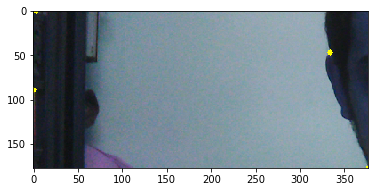

In [9]:
plt.imshow(frame_BGR_cropped)